## Code

reference: https://www.kaggle.com/jcrowe/model-comparison-for-breast-cancer-diagnosis/notebook

In [119]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for the check the error and accuracy of the model

from scipy.stats import randint as sp_randint

%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("data/data.csv", header=0)    # here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [81]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [82]:
# Remove unnecessary columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [83]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [84]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 1. Feature Selection

데이터의 차원이 총 30개로 너무 많았기 때문에 feature를 선택할 필요가 있었다. 그래서 feature 간의 상관관계를 분석했다.

### 1.1 Collinearity

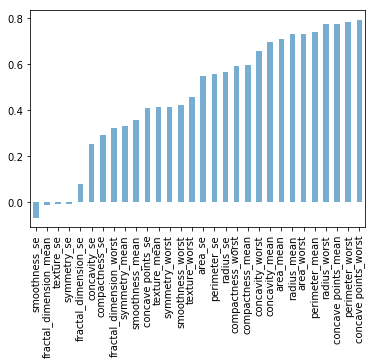

In [87]:
# Observe correlation to the diagnosis
tst = df.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [88]:
# Separate out malignant and benign data for graphing
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [89]:
# Column names to observe in following graphs - mean values only
observe = list(df.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = df.loc[:,observe]

In [90]:
observables.iloc[:3,]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,area_worst,perimeter_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,2019.0,184.6
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1956.0,158.8
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1709.0,152.5


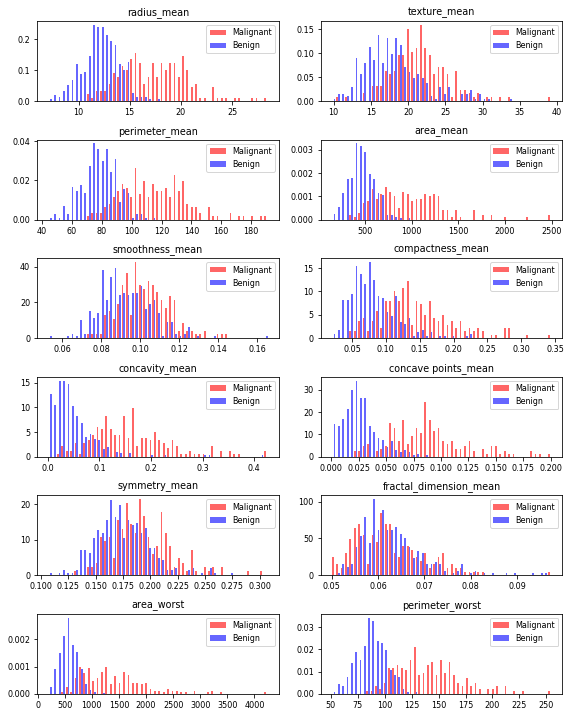

In [91]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(8,10))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(df[observe[idx]]) - min(df[observe[idx]]))/50
    bins = np.arange(min(df[observe[idx]]), max(df[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

### Observations

From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

/home/snu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


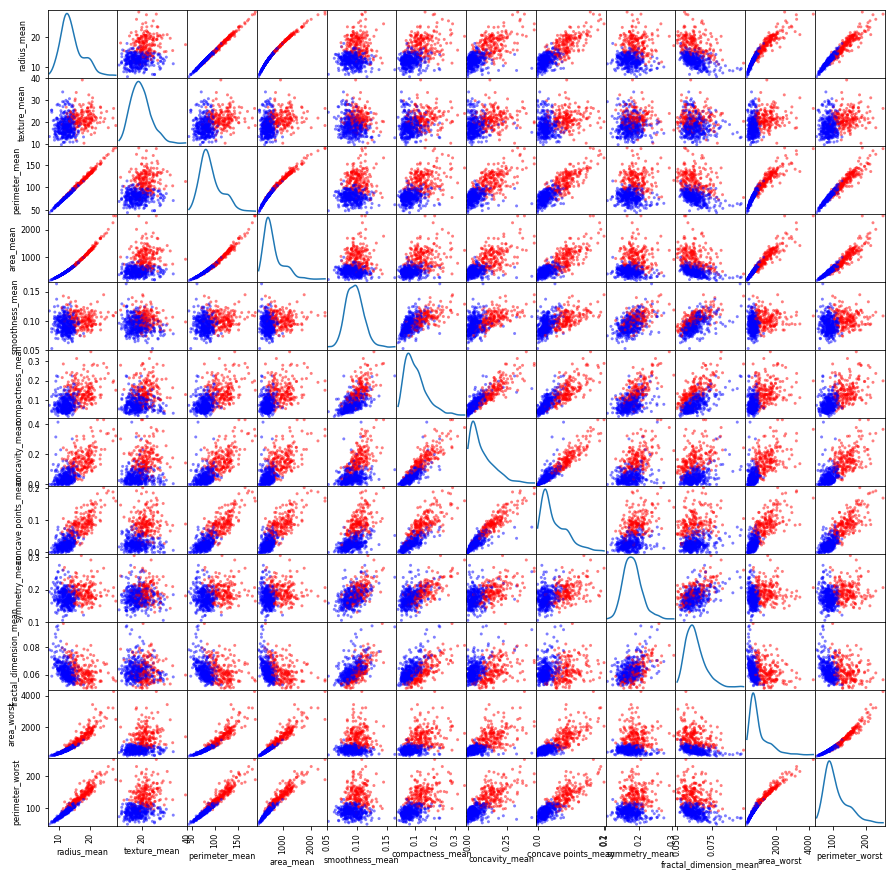

In [92]:
color_wheel = {0: "blue", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

### Observations

The scatter matrix clarifies a few more points. The perimeter_mean, area_mean and radius mean have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features with the exception of fractal_dimension_mean, symmetry_mean and smoothness_mean.

Within these three features we can see quite a bit of mixing between malignant and benign cancer in the scatter matrix. This suggests that our assumption above, that they do not aid in predicting cancer type, is likely correct. There is less correlation and separability between the two diagnoses.

Due to the lack of clear separability and lack of variance explained I feel comfortable dropping them.

#### Trimming Data

From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [93]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

## 2. Classification

Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm's performance will be made.

In [94]:
df2 = df.iloc[:,:]
# Remove unnecessary columns
df2.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

In [96]:
# now split our data into train and test
train, test = train_test_split(df2, test_size = 0.3) # in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 28)
(171, 28)


In [112]:
prediction_var = list(df2)[1:]
prediction_var

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [113]:
train_X = train[prediction_var]  # taking the training data input 
train_y = train.diagnosis  # This is output of our training data
# same we have to do for test
test_X = test[prediction_var]  # taking test data inputs
test_y = test.diagnosis  # output value of test data